# Importing Requiste Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing and Understanding the Data

In [2]:
loan = pd.read_csv("F:\IIIT ML & AI\Lending Club Case Study\loan.csv")

In [3]:
loan.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
#checking the total rows and column of the dataset
loan.shape

(39717, 111)

In [5]:
#checking for columns with partial and full null values
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [6]:
#Since multiple columns have total null values they do not contribute in any way hence dropping them
loan.dropna(axis = 1, how = 'all', inplace = True)

In [7]:
loan.shape

(39717, 57)

In [8]:
pd.set_option('display.max_columns', None)
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,34.000000,90.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,52.000000,104.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,129.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


In [9]:
loan.nunique().sort_values(ascending=True)

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
pymnt_plan                        1
initial_list_status               1
term                              2
next_pymnt_d                      2
pub_rec_bankruptcies              3
loan_status                       3
verification_status               3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
last_pymnt_d                

In [10]:
# creating a backup file
loan1=loan
loan1.shape

(39717, 57)

In [11]:
#Several columns have single values, they do not contribute to analysis
#retaining the charge off column as it is the target variable

loan1.drop(['collections_12_mths_ex_med','policy_code','acc_now_delinq', 'tax_liens', 'delinq_amnt','pymnt_plan', 'initial_list_status',  'application_type', 'pub_rec_bankruptcies'], axis = 1, inplace = True)

In [12]:
loan1.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


In [13]:
loan1.drop(["desc","total_pymnt_inv", "funded_amnt", "out_prncp_inv", "zip_code", "addr_state" , "id", "member_id", "url", "title", "emp_title", "last_credit_pull_d"], axis = 1, inplace = True)

In [14]:
loan1.shape

(39717, 36)

In [15]:
loan1.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'chargeoff_within_12_mths'],
      dtype='object')

There are still some columns which are not required for prediction of default like the fee columns

In [16]:
loan1.drop(['total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d'], axis = 1, inplace = True)

In [17]:
loan1.shape

(39717, 27)

In [18]:
loan1.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'chargeoff_within_12_mths'],
      dtype='object')

In [19]:
loan1.drop(['mths_since_last_record',], axis = 1, inplace = True)

In [20]:
loan1.shape

(39717, 26)

# We have retained the potential columns which makes business sense till this step. Next we shall check for %missing values and retaining relevant records

In [21]:
# Checking columns again for null value percentage
(loan1.isnull().sum()/loan1.shape[0]*100).round(2).sort_values(ascending=False)

mths_since_last_delinq      64.66
emp_length                   2.71
chargeoff_within_12_mths     0.14
revol_util                   0.13
issue_d                      0.00
funded_amnt_inv              0.00
term                         0.00
int_rate                     0.00
installment                  0.00
grade                        0.00
sub_grade                    0.00
home_ownership               0.00
annual_inc                   0.00
verification_status          0.00
loan_status                  0.00
out_prncp                    0.00
purpose                      0.00
dti                          0.00
delinq_2yrs                  0.00
earliest_cr_line             0.00
inq_last_6mths               0.00
open_acc                     0.00
pub_rec                      0.00
revol_bal                    0.00
total_acc                    0.00
loan_amnt                    0.00
dtype: float64

In [22]:
#dropping mths_since_last_delinq since it has 65% missing data
loan1.drop(['mths_since_last_delinq'], axis = 1, inplace = True)

In [23]:
#checking the for datatypes for the columns for missing value imputation
loan1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_amnt                 39717 non-null  int64  
 1   funded_amnt_inv           39717 non-null  float64
 2   term                      39717 non-null  object 
 3   int_rate                  39717 non-null  object 
 4   installment               39717 non-null  float64
 5   grade                     39717 non-null  object 
 6   sub_grade                 39717 non-null  object 
 7   emp_length                38642 non-null  object 
 8   home_ownership            39717 non-null  object 
 9   annual_inc                39717 non-null  float64
 10  verification_status       39717 non-null  object 
 11  issue_d                   39717 non-null  object 
 12  loan_status               39717 non-null  object 
 13  purpose                   39717 non-null  object 
 14  dti   

In [24]:
loan1.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

Since the 10+ years segment has far higher accounts compared to other segments and its a categoric valriable we can replace the value with mode

In [25]:
loan1.emp_length.mode()[0]

'10+ years'

In [26]:
loan1.emp_length.fillna(loan1.emp_length.mode()[0], inplace = True)
loan1.emp_length.isna().sum()

0

In [27]:
loan1.chargeoff_within_12_mths.value_counts()

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

This column seems to have single value hence can be deleted

In [28]:
loan1.drop(['chargeoff_within_12_mths'], axis = 1, inplace = True)

In [29]:
pd.set_option('display.max_rows', 100)
loan1.revol_util.sort_values(ascending=False).value_counts()

0%        977
0.20%      63
63%        62
66.70%     58
0.10%      58
         ... 
36.94%      1
23.11%      1
77.63%      1
10.61%      1
2.64%       1
Name: revol_util, Length: 1089, dtype: int64

In [30]:
loan1.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loan1.revol_util.isna().sum()

0

Ongoing loans do not add any value in determining default hence deleting them

In [31]:
loan2 = loan1
loan2 = loan2[loan2.loan_status  != "Current"]
loan2.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [32]:
loan2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38527 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38527 non-null  int64  
 1   funded_amnt_inv      38527 non-null  float64
 2   term                 38527 non-null  object 
 3   int_rate             38527 non-null  object 
 4   installment          38527 non-null  float64
 5   grade                38527 non-null  object 
 6   sub_grade            38527 non-null  object 
 7   emp_length           38527 non-null  object 
 8   home_ownership       38527 non-null  object 
 9   annual_inc           38527 non-null  float64
 10  verification_status  38527 non-null  object 
 11  issue_d              38527 non-null  object 
 12  loan_status          38527 non-null  object 
 13  purpose              38527 non-null  object 
 14  dti                  38527 non-null  float64
 15  delinq_2yrs          38527 non-null 

Interest Rate , Revolving Utilisation are technically numertic variable but here put as object. They need to be converted integers

In [33]:
loan2.int_rate=loan2.int_rate.apply(lambda x:str(x).replace('%','')).astype('float').round(2)
loan2.int_rate=loan2.revol_util.apply(lambda x:str(x).replace('%','')).astype('float').round(2)
loan2.emp_length=loan2.emp_length.apply(lambda x: x.replace('years','').replace('+','').replace('< 1','0.5').replace('year','')).astype(float)

Floats have several decimal point. Fixing all floats to 2 decimal point

In [34]:
for x in loan2.columns:
    if(loan2[x].dtype=='float64'):
      loan2[x]=loan2[x].round(2)

In [35]:
loan2.head(5)

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp
0,5000,4975.0,36 months,83.7,162.87,B,B2,10.0,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.0
1,2500,2500.0,60 months,9.4,59.83,C,C4,0.5,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.0
2,2400,2400.0,36 months,98.5,84.33,C,C5,10.0,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.0
3,10000,10000.0,36 months,21.0,339.31,C,C1,10.0,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,0,Feb-96,1,10,0,5598,21%,37,0.0
5,5000,5000.0,36 months,28.3,156.46,A,A4,3.0,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.0


# Data Analysis - Checking for Outliers and relevant treatments

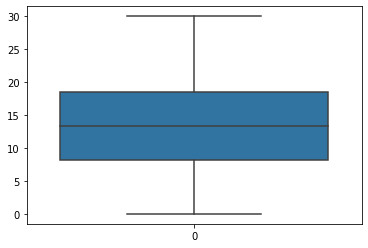

In [36]:
sns.boxplot(loan2.dti)

The DTI doesnt seem to have outliers

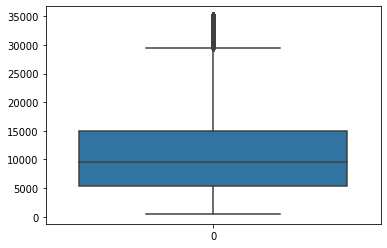

In [37]:
sns.boxplot(loan2.loan_amnt)

There are some outliers in the higher deciles so further investigation needed.

In [38]:
loan2.loan_amnt.quantile([0.75,0.90,0.95,0.96, 0.97, 0.98, 0.99, 1.0])

0.75    15000.0
0.90    21600.0
0.95    25000.0
0.96    25000.0
0.97    28000.0
0.98    30000.0
0.99    35000.0
1.00    35000.0
Name: loan_amnt, dtype: float64

These doesnt seem outliers but some high ticket loans

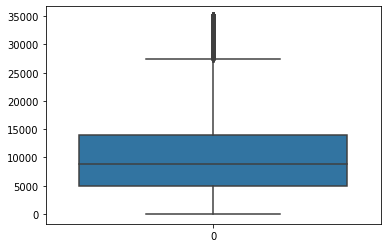

In [39]:
sns.boxplot(loan2.funded_amnt_inv)

In [40]:
loan2.funded_amnt_inv.quantile([0.75,0.90,0.95,0.96, 0.97, 0.98, 0.99, 1.0])

0.75    14000.0000
0.90    19975.0000
0.95    24506.5790
0.96    24950.0000
0.97    25828.0596
0.98    29890.4124
0.99    34721.5836
1.00    35000.0000
Name: funded_amnt_inv, dtype: float64

Here there are ouliers but the distribution is fairly continuous so not removing outliers

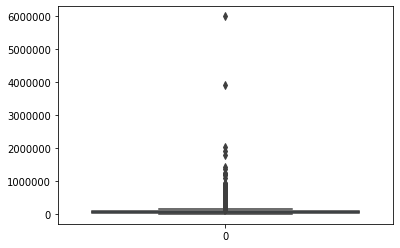

In [41]:
sns.boxplot(loan2['annual_inc'])

This metric has lot of outliers and far spaced

In [42]:
dist = loan2.annual_inc.quantile([0.5, 0.75,0.80,0.85, 0.90, 0.95, 0.96, 0.97,0.98, 0.99,1])
dist

0.50      59000.0
0.75      82000.0
0.80      90000.0
0.85     100000.0
0.90     115000.0
0.95     140004.0
0.96     150000.0
0.97     165000.0
0.98     187000.0
0.99     234000.0
1.00    6000000.0
Name: annual_inc, dtype: float64

There is a big spike afrom 95th percentile onwards for a 5% change, hence doing outlier treatment for points above 95% percentile

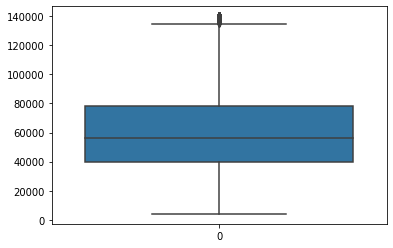

In [43]:
dist_95plus = loan2['annual_inc'].quantile(0.95)
loan2 = loan2[loan2.annual_inc <= dist_95plus]
sns.boxplot(loan2['annual_inc'])

# Analysizing the Categoric Variables

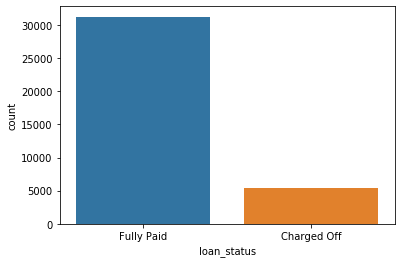

In [44]:
sns.countplot(x = 'loan_status', data = loan2)

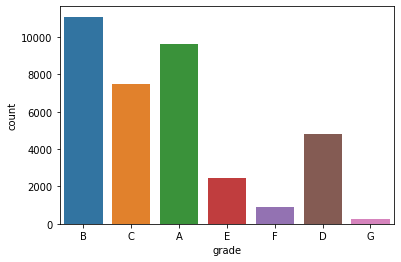

In [45]:
sns.countplot(x = 'grade', data = loan2)

Higher grades have more population for the completed loan base

In [46]:
loan2.sub_grade.unique()

array(['B2', 'C4', 'C5', 'C1', 'A4', 'E1', 'F2', 'B5', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F1', 'E5', 'G4', 'E2', 'G2', 'G1', 'F5', 'F4',
       'G5', 'G3'], dtype=object)

The numberic value of subgrade has to be extracted

In [47]:
loan2.sub_grade = pd.to_numeric(loan2.sub_grade.apply(lambda x : x[-1]))

In [48]:
loan2.sub_grade.unique()

array([2, 4, 5, 1, 3], dtype=int64)

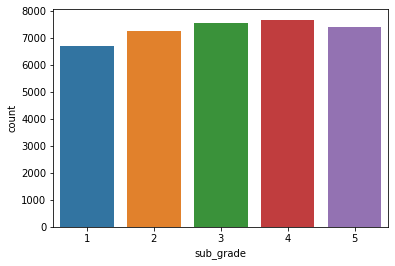

In [49]:
sns.countplot(x = 'sub_grade', data = loan2)

For the completed loans (default & full paid) the subgrade by it self doesnt add much value

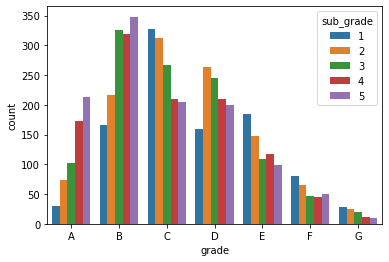

In [50]:
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan2[loan2.loan_status == 'Charged Off'])

When we check only for deafaults the grade B and C shows highest counts followed by A & D

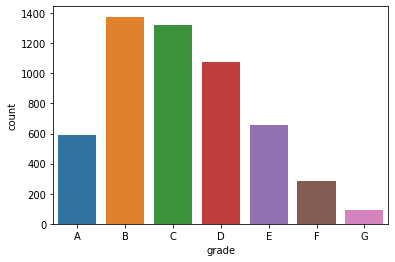

In [51]:
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , data = loan2[loan2.loan_status == 'Charged Off'])

B C D shows considerable increase in counts in the default segment

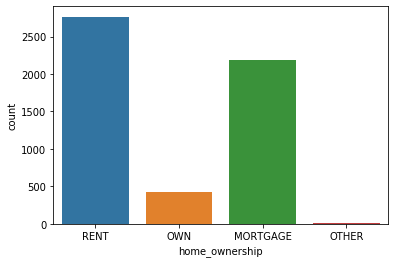

In [52]:
sns.countplot(x='home_ownership', data=loan2[loan2['loan_status']=='Charged Off'])

In [53]:
100*loan2.home_ownership.value_counts()/loan2.shape[0]

RENT        49.172267
MORTGAGE    42.793531
OWN          7.777414
OTHER        0.248593
NONE         0.008195
Name: home_ownership, dtype: float64

People staying in Rent has highest chances of default fowllowed by Morgage with slight lower defaults

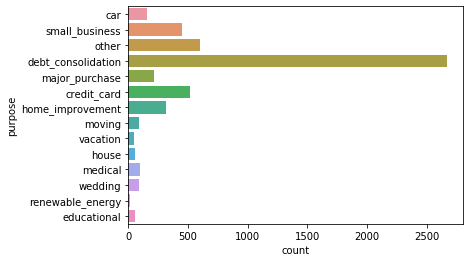

In [54]:
sns.countplot(y ='purpose', data=loan2[loan2.loan_status == 'Charged Off'])

Debt Consolidation followed by Credit card, Small business are key drivers. 

# Binning Numeric Variables for better understanding

In [55]:
loan2.int_rate.describe()

count    36606.000000
mean        48.659741
std         28.282836
min          0.000000
25%         25.300000
50%         49.000000
75%         72.100000
max         99.900000
Name: int_rate, dtype: float64

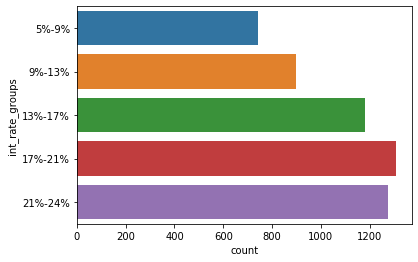

In [56]:
loan2['int_rate_groups'] = pd.cut(loan2['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
sns.countplot(y ='int_rate_groups', data=loan2[loan2.loan_status == 'Charged Off'])

Higher Interest Rate has higher chance of default

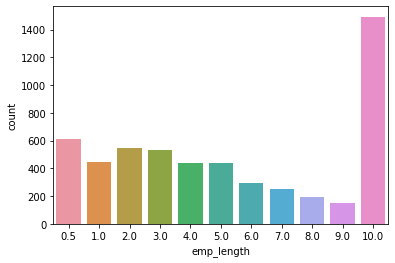

In [57]:
sns.countplot(x='emp_length', data=loan2[loan2.loan_status == 'Charged Off'])

Customers with employement over 10yrs show more propencity of default

# Binning and checking metrics like total account open, income, utilisation

In [58]:
loan2.revol_util.unique()

array(['83.70%', '9.40%', '98.50%', ..., '49.63%', '0.04%', '7.28%'],
      dtype=object)

In [59]:
loan2.revol_util = pd.to_numeric(loan2.revol_util.apply(lambda x : x.split('%')[0]))

In [60]:
loan2.revol_util.unique()

array([8.370e+01, 9.400e+00, 9.850e+01, ..., 4.963e+01, 4.000e-02,
       7.280e+00])

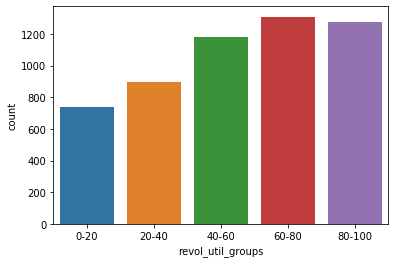

In [61]:
loan2['revol_util_groups'] = pd.cut(loan2['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
sns.countplot(x='revol_util_groups', data=loan2[loan2.loan_status == 'Charged Off'])

Higher Revolvers are higher defauters from the trends

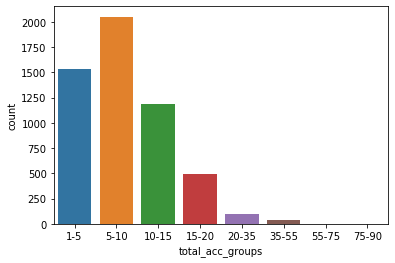

In [62]:
loan2['total_acc_groups'] = pd.cut(loan2['total_acc'], bins=8,precision =0,labels=['1-5','5-10','10-15','15-20','20-35','35-55','55-75','75-90'])
sns.countplot(x='total_acc_groups', data=loan2[loan2.loan_status == 'Charged Off'])

Customers having upto 5-10 accounts has the highest default chances

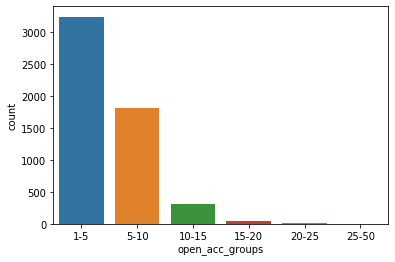

In [63]:
loan2['open_acc_groups'] = pd.cut(loan2['open_acc'],bins = 6,precision =0,labels=['1-5','5-10','10-15','15-20','20-25','25-50'])
sns.countplot(x='open_acc_groups', data=loan2[loan2.loan_status == 'Charged Off'])

Customers having upto 5 accounts open has the highest default chances

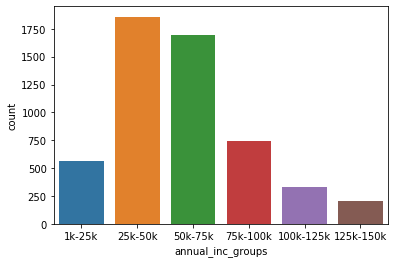

In [64]:
loan2['annual_inc_groups'] = pd.cut(loan2['annual_inc'], bins=6,precision =0,labels =['1k-25k','25k-50k','50k-75k','75k-100k','100k-125k','125k-150k'])
sns.countplot(x='annual_inc_groups', data=loan2[loan2.loan_status == 'Charged Off'])

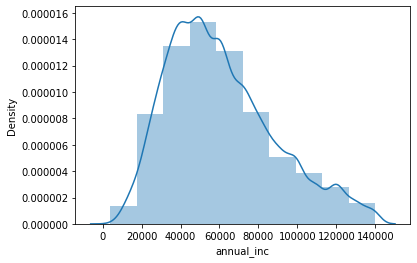

In [65]:
sns.distplot(loan2.annual_inc,kde=True,bins=10)

Mid income groups 25-75K have the higest default rates

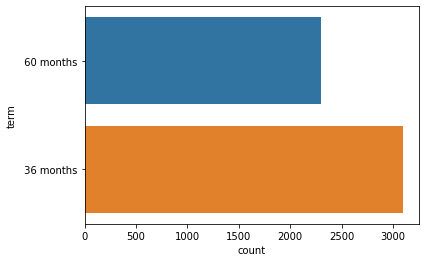

In [66]:
sns.countplot(y='term', data=loan2[loan2['loan_status']=='Charged Off'])

Short term loans typically have a higher EMI leading to more defaults chances

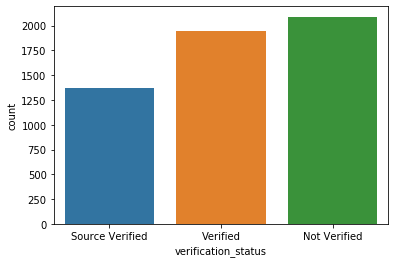

In [67]:
sns.countplot(x='verification_status', data=loan2[loan2['loan_status']=='Charged Off'])

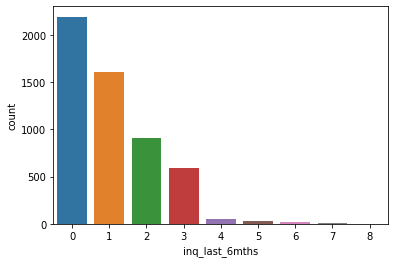

In [68]:
sns.countplot(x='inq_last_6mths', data=loan2[loan2['loan_status']=='Charged Off'])

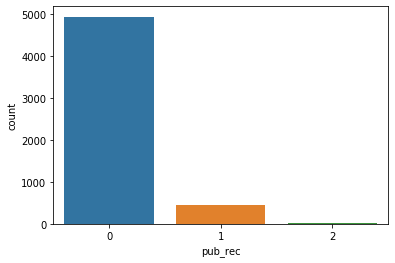

In [69]:
sns.countplot(x='pub_rec', data=loan2[loan2['loan_status']=='Charged Off'])

From the profile it appears a set of customers who earstwhile did not have much transactions with the bank and clean have defaulted. Other reason need to be looked at

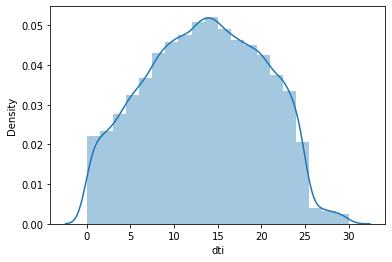

In [70]:
sns.distplot(loan2.dti,kde=True,bins=20)

The borrowers who defaulted have a low DTI concentrated around 15%

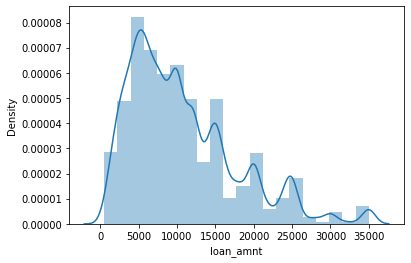

In [71]:
sns.distplot(loan2.loan_amnt,kde=True,bins=20)

loans between 5000 to 10000 has higher chances of default

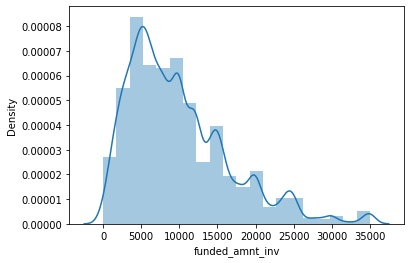

In [72]:
sns.distplot(loan2.funded_amnt_inv,kde=True,bins=20)

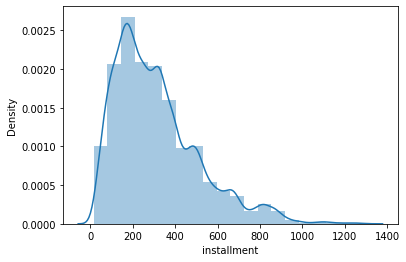

In [73]:
sns.distplot(loan2.installment,kde=True,bins=20)

Installment less than 400 has higher chance of default

# Checking Temporal Variable like Issue date

In [74]:
## Extracting month and year
df_month_year = loan2['issue_d'].str.partition("-", True)     
loan2['issue_month']=df_month_year[0]                       
loan2['issue_year']='20' + df_month_year[2]

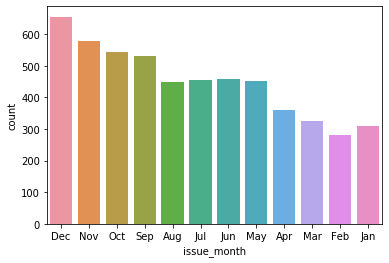

In [75]:
sns.countplot(x='issue_month', data=loan2[loan2['loan_status']=='Charged Off'])


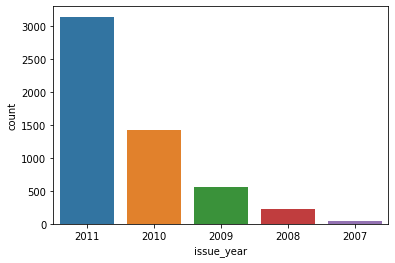

In [76]:
sns.countplot(x='issue_year', data=loan2[loan2['loan_status']=='Charged Off'])

2011 have very high number of defaults compared to other years and Later months of the year typically have more defaults

# Univariate Inferences

Observation of Customers who have higher propencity of default
1. Customers using loan for debt consolidation / CC bills payments
2. Mid Income range customers from 30-60k Income
3. Customers staying in rented or mortgaged home [monthly outgoings towards their stay stresses their finances]
4. Tenured Applicants with 10+ years
5. Low DTI of around 15%
6. Low monthly installments of <400
7. Lower term loans of 36 months
8. Relatively new and good customers with 0 enquiries in last 6 months & NO derogratory public record
9. Grade B & C has higher default chances
10. Non verified applications
11. Applicants who have 20-40 open_acc
12. Loans issued in 4Q and Loans issued in 2011 has much higher default chances

# Bi Variate Analysis

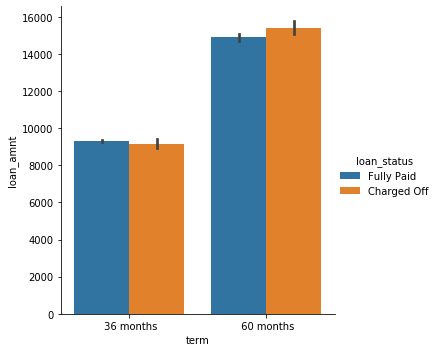

In [77]:
sns.catplot(x = 'term', y = 'loan_amnt', data = loan2,hue = 'loan_status', kind = 'bar')

Loan amount doesnt play a role in default, Higher ticket loans have longer term 

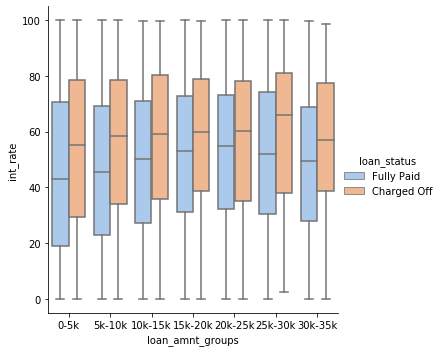

In [78]:
loan2['loan_amnt_groups'] = pd.cut(loan2['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
sns.catplot(data =loan2,y ='int_rate', x ='loan_amnt_groups', hue ='loan_status',palette="pastel",kind = 'box')

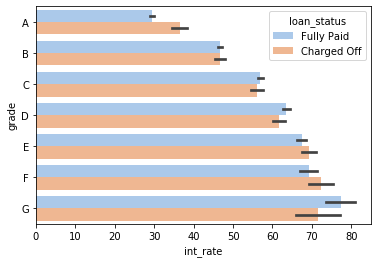

In [79]:
sns.barplot(data =loan2,x='int_rate', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])

Charged off loans have higher Interest rates compared to fully paid ones in every loan segment

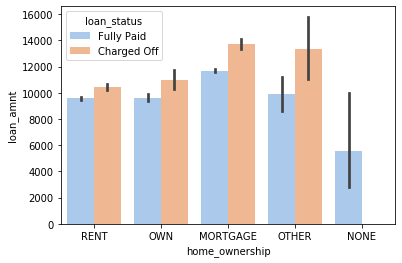

In [80]:
sns.barplot(data =loan2,y='loan_amnt', x='home_ownership', hue ='loan_status',palette="pastel")

Customers with MORTGAGE and have loan of 14-16k

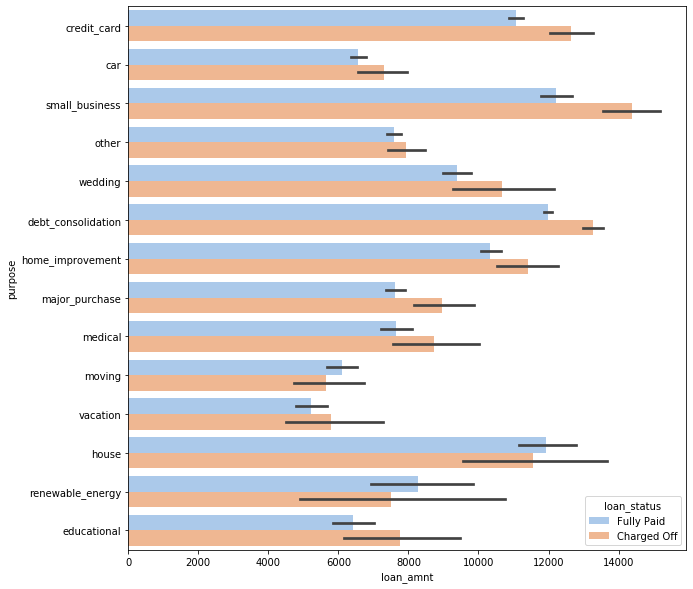

In [81]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan2,x='loan_amnt', y='purpose', hue ='loan_status',palette="pastel")

Customers where loan purpose small business and the loan amount is greater than 14k

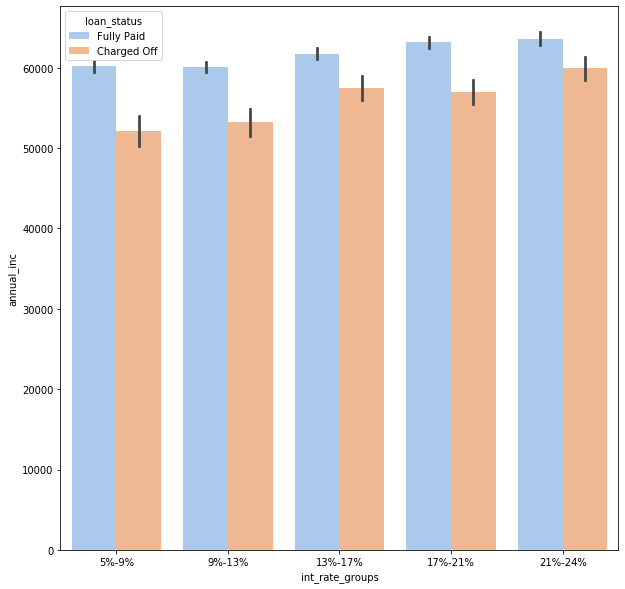

In [82]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan2,x='int_rate_groups', y='annual_inc', hue ='loan_status',palette="pastel")

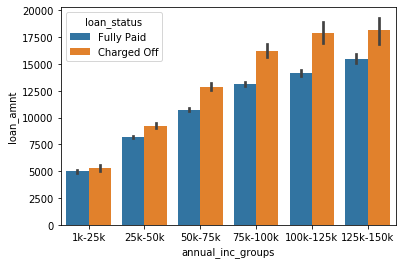

In [83]:
sns.barplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', data = loan2)

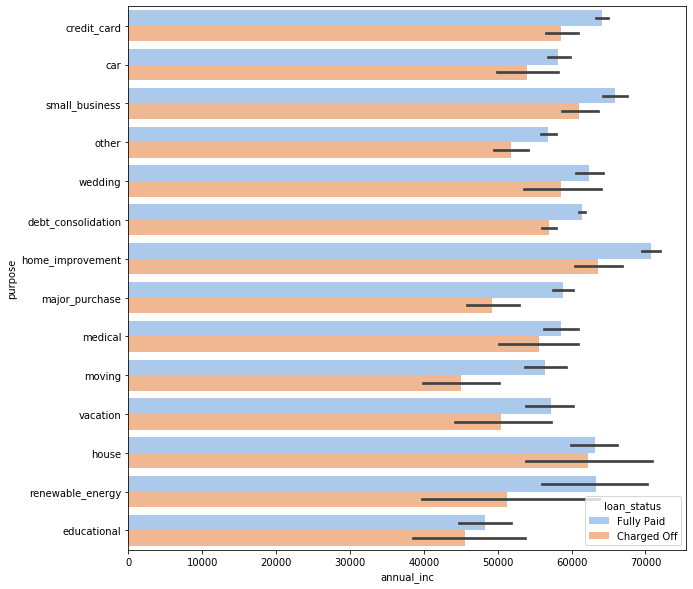

In [84]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan2,x='annual_inc', y='purpose', hue ='loan_status',palette="pastel")

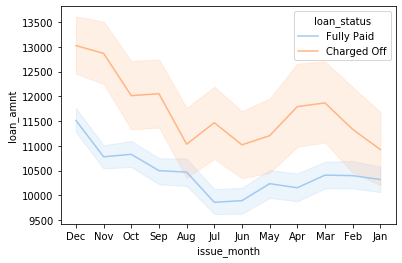

In [85]:
sns.lineplot(data =loan2,y='loan_amnt', x='issue_month', hue ='loan_status',palette="pastel")

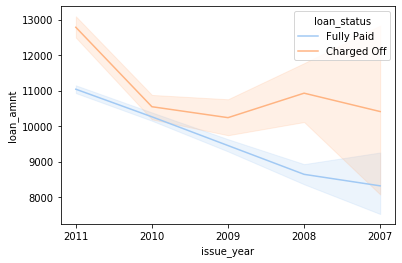

In [86]:
sns.lineplot(data =loan2,y='loan_amnt', x='issue_year', hue ='loan_status',palette="pastel")

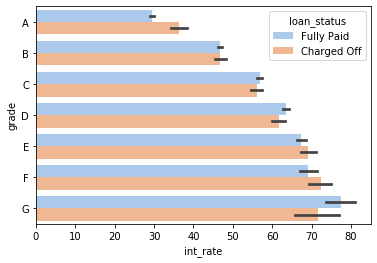

In [87]:
sns.barplot(data =loan2,x='int_rate', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])

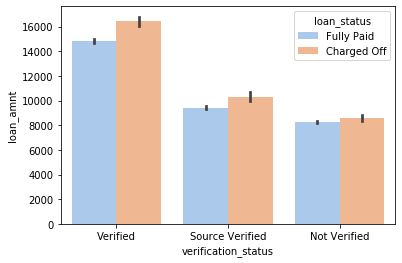

In [88]:
sns.barplot(data =loan2,y='loan_amnt', x='verification_status', hue ='loan_status',palette="pastel")

The below listed Segments have more probability of default
1. Applicants who have Mortgage or have take loans for home improvement and 60-70k income
2. Applicants who get loans at higher interest rates
3. Small business loans above 14,000
4. Experience above 10yrs and around 14k loan
5. High ticket verified loans of 14-16k loan size
6. interest rate 20%+ and Grade G loans